1) Importing the .csv Files

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn
from scipy.stats import pointbiserialr

In [3]:
# Folder path
folder_path = r"C:\Users\acts5\OneDrive\Test Data Files"

# Get all file paths
files = glob.glob(os.path.join(folder_path, "*.csv"))

#store each file
dfs = []
for f in files:
    df = pd.read_csv(f)
    dfs.append(df)
    print(f)

C:\Users\acts5\OneDrive\Test Data Files\AlyssaWong_2025-11-08_21-48-49_data.csv
C:\Users\acts5\OneDrive\Test Data Files\ArianaSmith_2025-11-05_14-45-15_data.csv
C:\Users\acts5\OneDrive\Test Data Files\DesireeAlamanche_2025-11-07_15-02-59_data.csv
C:\Users\acts5\OneDrive\Test Data Files\EmilyRestmeyer_2025-11-06_21-06-33_data.csv
C:\Users\acts5\OneDrive\Test Data Files\EzraPanjwani_2025-11-06_21-30-16_data.csv
C:\Users\acts5\OneDrive\Test Data Files\GayatriBrijesh_2025-11-09_02-37-54_data.csv
C:\Users\acts5\OneDrive\Test Data Files\KyleChen_2025-11-06_14-02-12_data.csv
C:\Users\acts5\OneDrive\Test Data Files\LaurenMathios_2025-11-06_20-52-24_data.csv
C:\Users\acts5\OneDrive\Test Data Files\LeannaYumul_2025-11-05_12-29-19_data.csv
C:\Users\acts5\OneDrive\Test Data Files\LezitaNg_2025-11-08_21-06-36_data.csv
C:\Users\acts5\OneDrive\Test Data Files\Niru_2025-11-06_15-02-02_data.csv
C:\Users\acts5\OneDrive\Test Data Files\PariRadhaSharma_2025-11-07_15-20-59_data.csv
C:\Users\acts5\OneDrive\

In [4]:
#combine into one dataset
posture_df = pd.concat(dfs, ignore_index=True)

#Preview
posture_df.head()

,timestamp,session_id,label,total_force_N,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_62,sensor_63,name,gender,age,height_cm,weight_kg,ethnicity,chair_type,work_activity
0,56757,AlyssaWong_2025-11-08_21-48-49,neutral,-1185.89,546,542,546,540,546,539,...,559,553,Alyssa Wong,F,19,167,110,Mixed,Office,Computer
1,56901,AlyssaWong_2025-11-08_21-48-49,neutral,-1185.73,546,542,546,540,547,539,...,559,553,Alyssa Wong,F,19,167,110,Mixed,Office,Computer
2,57044,AlyssaWong_2025-11-08_21-48-49,neutral,-1185.58,546,542,547,540,547,539,...,559,553,Alyssa Wong,F,19,167,110,Mixed,Office,Computer
3,57188,AlyssaWong_2025-11-08_21-48-49,neutral,-1185.77,546,542,546,541,547,539,...,559,553,Alyssa Wong,F,19,167,110,Mixed,Office,Computer
4,57332,AlyssaWong_2025-11-08_21-48-49,neutral,-1185.58,546,542,547,541,547,540,...,559,553,Alyssa Wong,F,19,167,110,Mixed,Office,Computer


****EDA and Cleaning****

In [5]:
posture_df.isna().any().any() #no missing values
posture_df['label'].unique() # neutral, upright, slouch
posture_df['label'].value_counts() # more neutral vals

label
neutral     23066
slouch      17018
upright     16418
shifting     2604
Name: count, dtype: int64

In [6]:
# Map gender from categorical to numeric
"""""
gender_map = {
    'F': 0,
    'M': 1,
}
posture_df['gender'] = posture_df['gender'].map(gender_map)
print(posture_df['gender'].unique()) 
"""

# Map labels from categorical to numeric
labels_map = {
    'neutral': 0,
    'upright': 1,
    'slouch': 2,
    'shifting': 3
}

posture_df['label'] = posture_df['label'].map(labels_map)
print(posture_df['label'].unique())

bin_labels = {
    2: 1,
    0: 0,
    1: 0,
    3: 0
}

posture_df['bin_label'] = posture_df['label'].map(bin_labels)
print(posture_df[['label', 'bin_label']].head())

[0 3 2 1]
   label  bin_label
0      0          0
1      0          0
2      0          0
3      0          0
4      0          0


In [7]:
# Check the counts for each class
print(posture_df['bin_label'].value_counts())
print(posture_df['label'].value_counts())


bin_label
0    42088
1    17018
Name: count, dtype: int64
label
0    23066
2    17018
1    16418
3     2604
Name: count, dtype: int64


In [8]:
#All force values are positive
posture_df['total_force_N'] = posture_df['total_force_N'].abs()
print((posture_df['total_force_N'] >= 0).all())

# drop name, session_id, ethnicity, work_activity, age, and gender
posture_df = posture_df.drop(columns = ['name','chair_type','session_id','work_activity', 'ethnicity', 'age', 'gender', 'timestamp'])
posture_df.head()

True


,label,total_force_N,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_57,sensor_58,sensor_59,sensor_60,sensor_61,sensor_62,sensor_63,height_cm,weight_kg,bin_label
0,0,1185.89,546,542,546,540,546,539,544,538,...,560,565,557,562,554,559,553,167,110,0
1,0,1185.73,546,542,546,540,547,539,544,538,...,560,565,557,562,554,559,553,167,110,0
2,0,1185.58,546,542,547,540,547,539,544,538,...,560,565,557,562,554,559,553,167,110,0
3,0,1185.77,546,542,546,541,547,539,544,538,...,560,565,557,562,554,559,553,167,110,0
4,0,1185.58,546,542,547,541,547,540,544,539,...,560,565,557,562,554,559,553,167,110,0


In [9]:
#Standardization of sensors, force, height and weight
from sklearn.preprocessing import StandardScaler

sensors = [f'sensor_{i}' for i in range(64)]
scaler = StandardScaler()
# Features to standardize: sensors + total force + height + weight
feature_cols = sensors + ['total_force_N', 'height_cm', 'weight_kg']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
posture_df[feature_cols] = scaler.fit_transform(posture_df[feature_cols])

# Optional: check the results
print(posture_df[feature_cols].head())

   sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
0  0.406566  0.284767  0.327183  0.335559  0.351216  0.353589  0.372192   
1  0.406566  0.284767  0.327183  0.335559  0.367498  0.353589  0.372192   
2  0.406566  0.284767  0.342931  0.335559  0.367498  0.353589  0.372192   
3  0.406566  0.284767  0.327183  0.351784  0.367498  0.353589  0.372192   
4  0.406566  0.284767  0.342931  0.351784  0.367498  0.370029  0.372192   

   sensor_7  sensor_8  sensor_9  ...  sensor_57  sensor_58  sensor_59  \
0  0.382360  0.604516   0.12855  ...   0.146247   0.419745   0.568086   
1  0.382360  0.604516   0.12855  ...   0.146247   0.419745   0.568086   
2  0.382360  0.604516   0.12855  ...   0.146247   0.419745   0.568086   
3  0.382360  0.604516   0.12855  ...   0.146247   0.419745   0.568086   
4  0.399117  0.604516   0.12855  ...   0.146247   0.419745   0.568086   

   sensor_60  sensor_61  sensor_62  sensor_63  total_force_N  height_cm  \
0    0.73842   0.747668   0.758102 

In [10]:
#New cleaned .csv of the data

posture_df = posture_df.drop(columns=['label'])
output_path = r"C:\Users\acts5\OneDrive\Test Data Files\cleaned_posture_dataset.csv"
posture_df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: C:\Users\acts5\OneDrive\Test Data Files\cleaned_posture_dataset.csv


****Feature Plots****

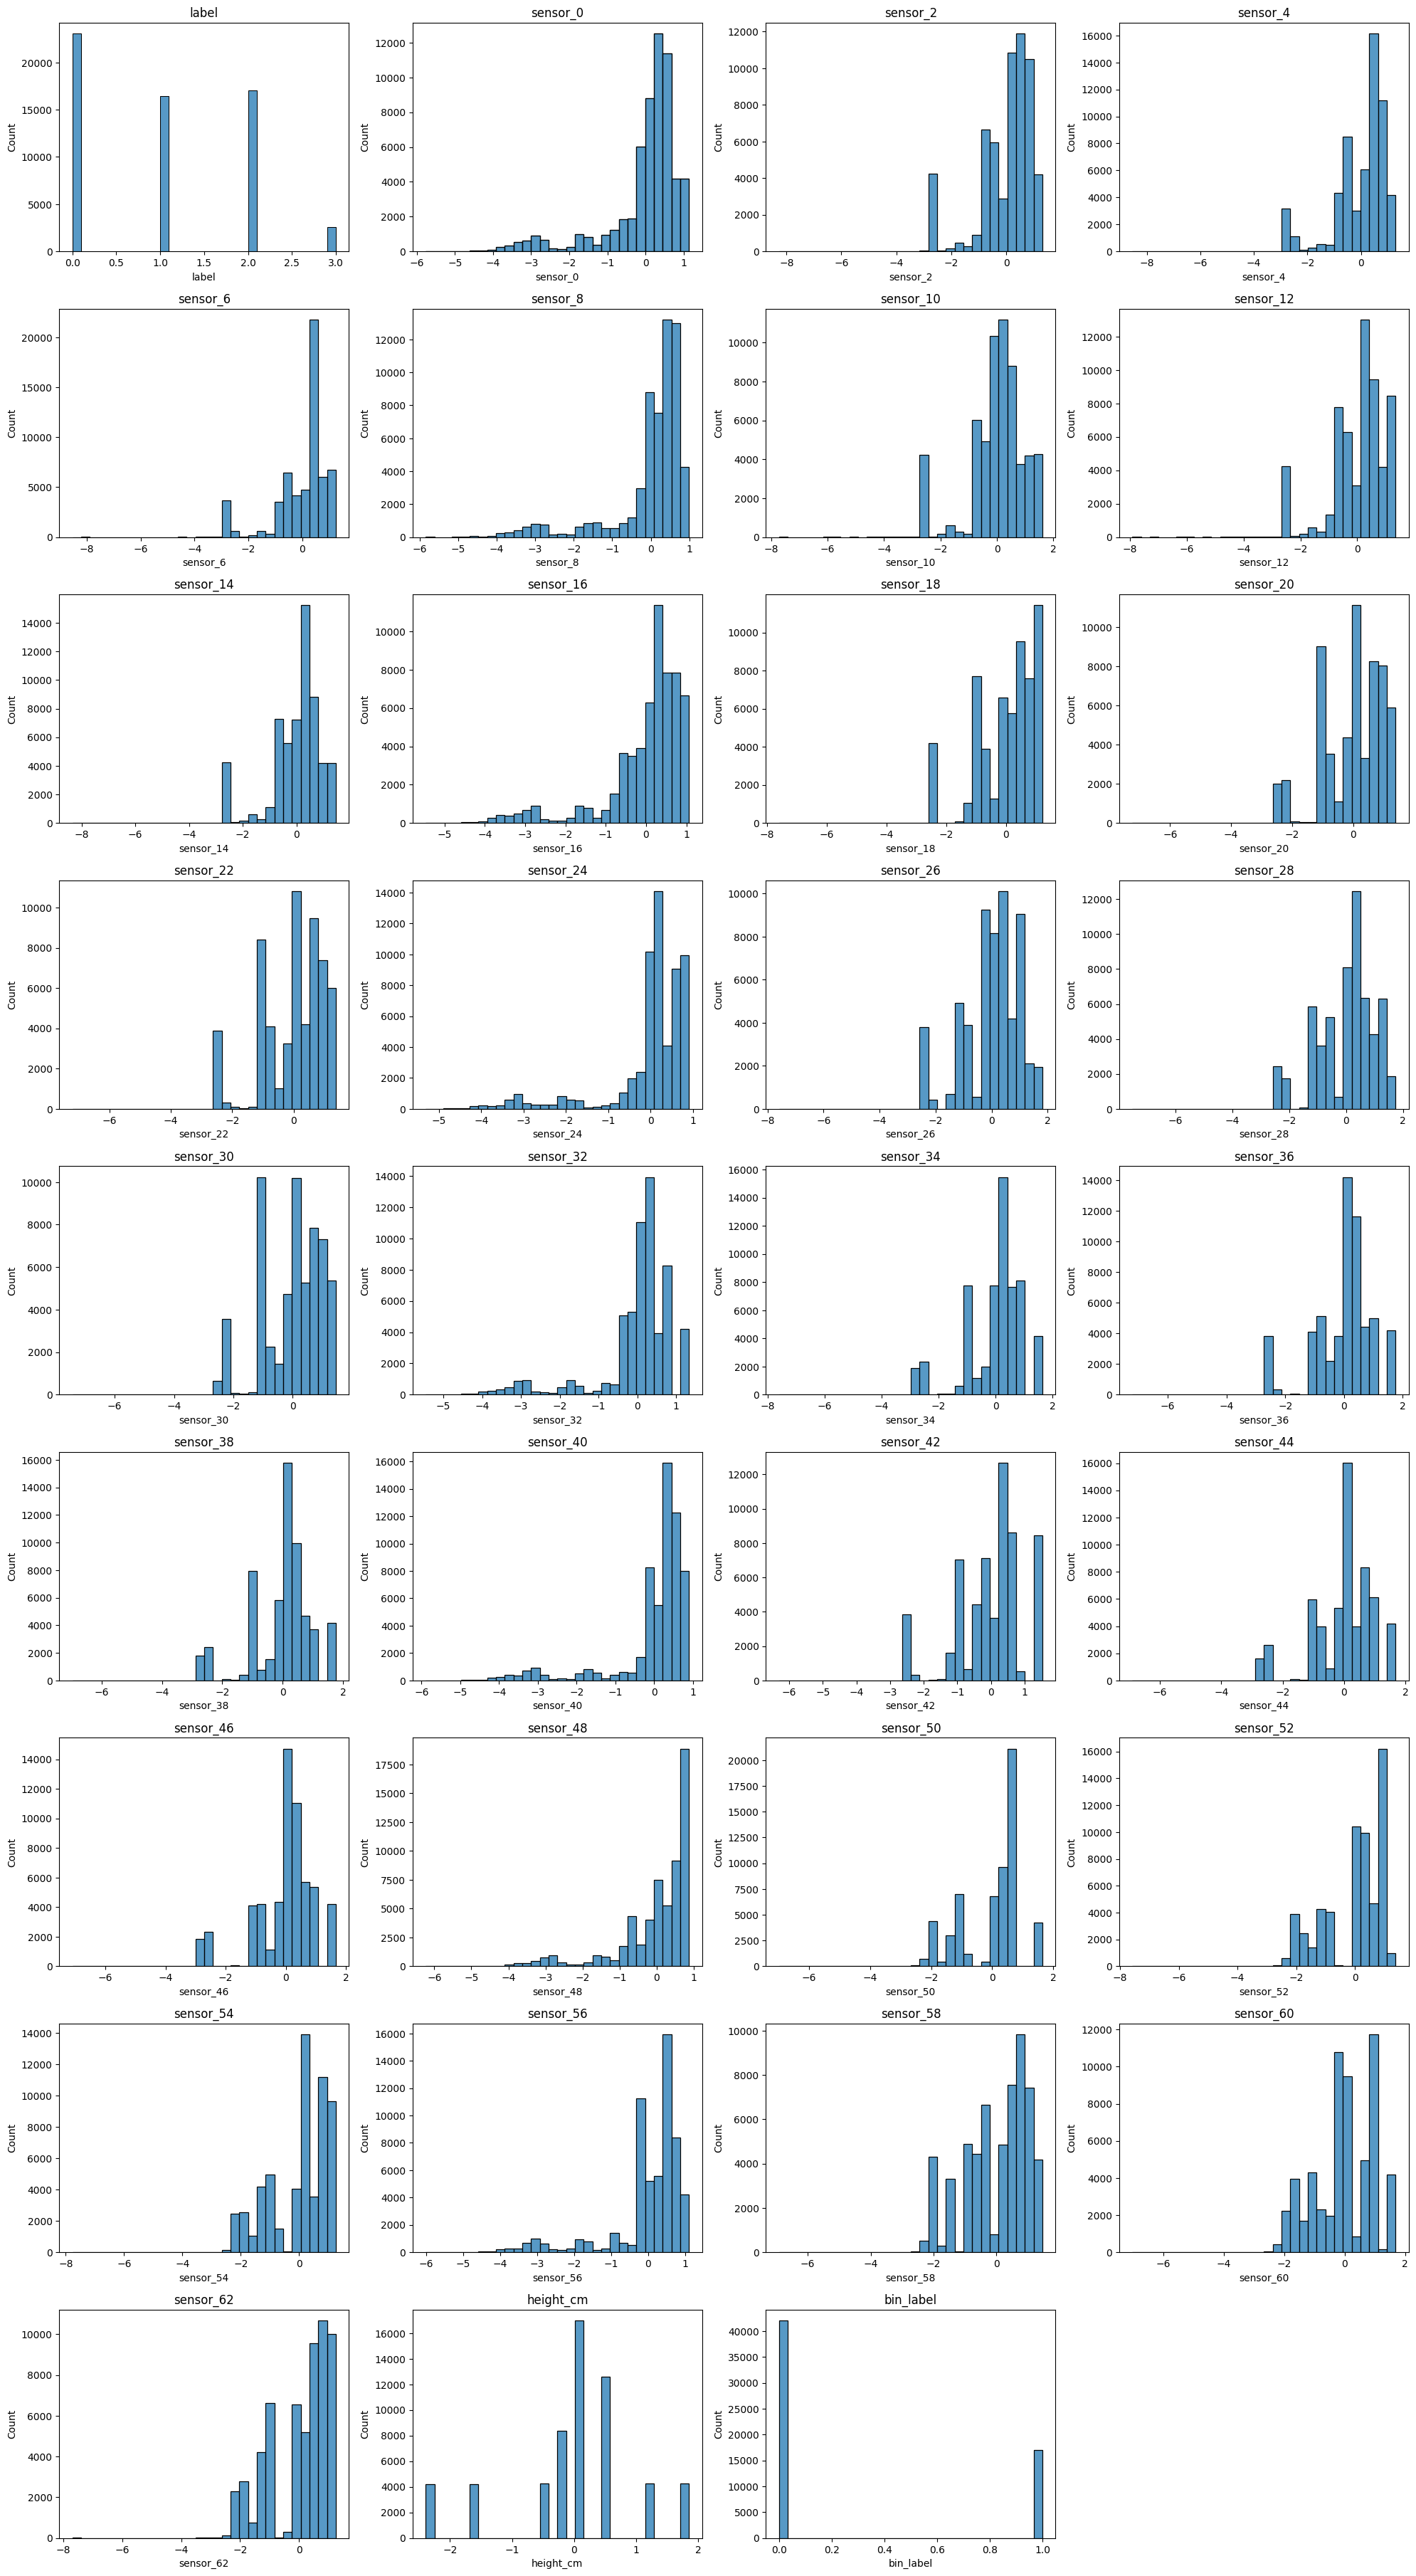

In [9]:
n_cols = 4
n_rows = (len(posture_df.columns) + n_cols - 1) // n_cols

selected_cols = posture_df.columns[::2]

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(selected_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(posture_df[col], bins=30, kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


#### **Correlation between features and target**

- Pearson correlation between continuous and continuous
- Point Biserial correlation between continuous and categorical

C:\Users\acts5\AppData\Local\Temp\ipykernel_21700\1112526614.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_df.index, y='PointBiserial', data=corr_df, palette='coolwarm')


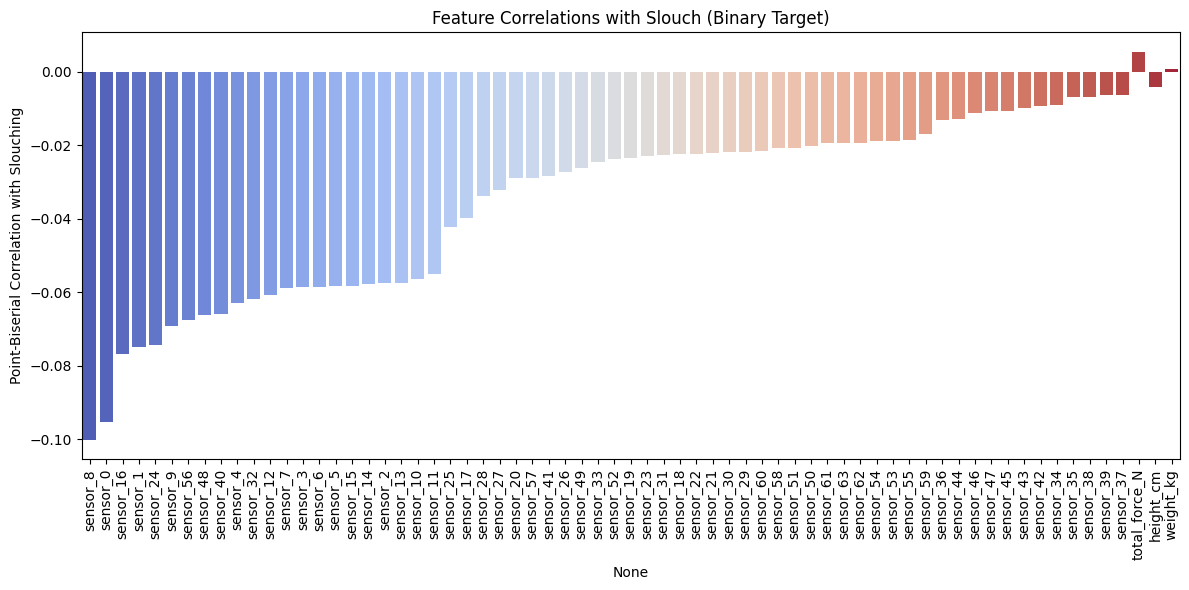

C:\Users\acts5\AppData\Local\Temp\ipykernel_21700\1112526614.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_df.head(top_n).index, y='PointBiserial', data=corr_df.head(top_n), palette='viridis')


<Axes: xlabel='None', ylabel='PointBiserial'>

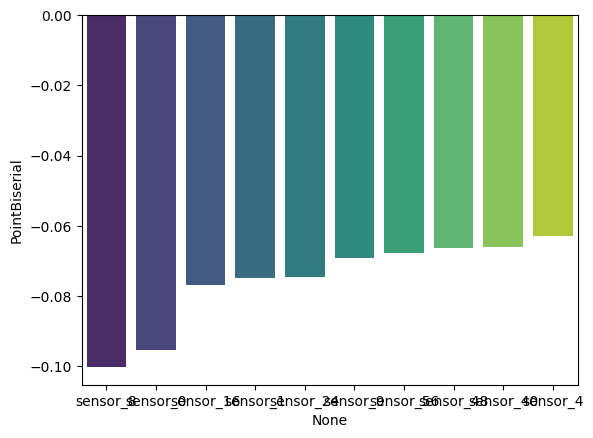

In [10]:
# List of continuous features
sensor_cols = [f'sensor_{i}' for i in range(64)]
continuous_cols = sensor_cols + ['total_force_N', 'height_cm', 'weight_kg']

# Dictionary to store correlations
corr_with_slouch = {}

for col in continuous_cols:
    r, p = pointbiserialr(posture_df[col], posture_df['bin_label'])
    corr_with_slouch[col] = r

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame.from_dict(corr_with_slouch, orient='index', columns=['PointBiserial'])
corr_df.sort_values('PointBiserial', key=abs, ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x=corr_df.index, y='PointBiserial', data=corr_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Point-Biserial Correlation with Slouching')
plt.title('Feature Correlations with Slouch (Binary Target)')
plt.tight_layout()
plt.show()

top_n = 10
sns.barplot(x=corr_df.head(top_n).index, y='PointBiserial', data=corr_df.head(top_n), palette='viridis')
